# Predecir el coste del seguro médico de una persona (Solucion)

### Paso 1: Carga del conjunto de datos

In [12]:
import pandas as pd


total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv")
total_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#### Exploracion y limpieza de datos

In [3]:
# Obtener dimensiones
total_data.shape

(1338, 7)

El DataFrame contiene 1338 registros (total de filas) y 7 variables (total de columnas).

In [4]:
# Obtener información sobre tipos de datos y valores no nulos
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
total_data = total_data.drop_duplicates().reset_index(drop = True)
total_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


De la información anterior, vemos que no tenemos algunos registros NaN.

En cuanto a tipos de datos, tenemos:

- 3 características categóricas (`id sex, smoker, region`)
- 4 características numéricas (`age, bmi, children, charges`)

#### Analisis de variables univariadas

##### Variables categoricas

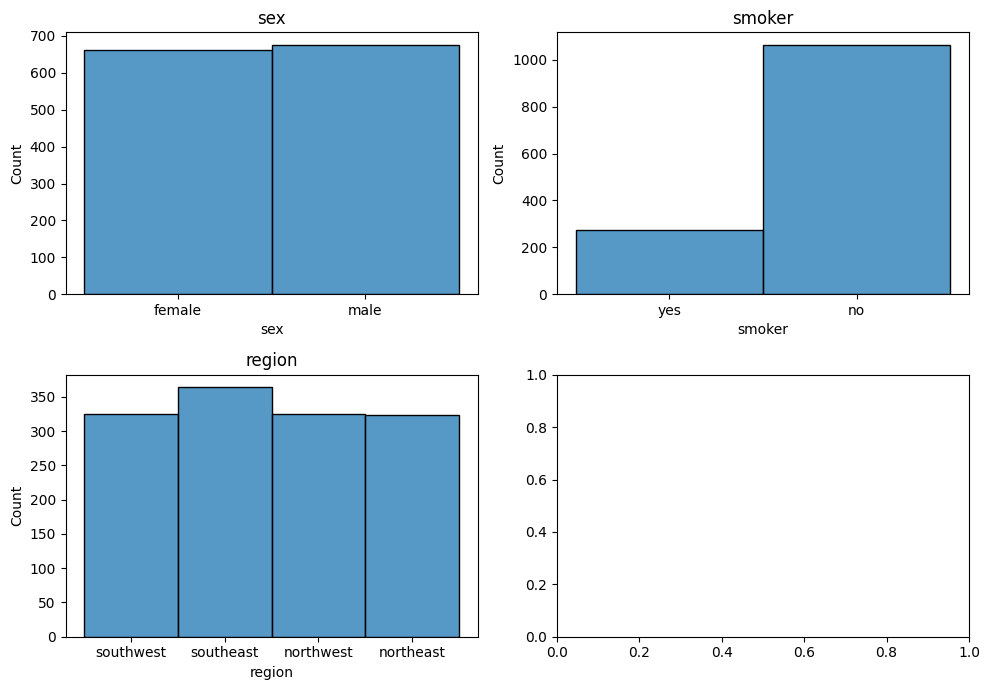

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select categorical variables (assuming "id" is not categorical)
categorical_vars = ["sex", "smoker", "region"]

# Create a figure with appropriate subplots for clarity
fig, axes = plt.subplots(2, 2, figsize=(10, 7))  # 2 rows, 2 columns

# Create histograms for each categorical variable
for i, var in enumerate(categorical_vars):
    row = i // 2
    col = i % 2
    sns.histplot(ax=axes[row, col], data=total_data, x=var)
    axes[row, col].set_title(var)

# Adjust layout and remove unnecessary axes (optional)
plt.tight_layout()

# Show the plot
plt.show()

Del histograma podemos decir que:

* (`sex`) En relacion al genero del beneficiario principal, existe una representacion similar de personas del sexo masculino y femenino.

* (`smoker`) En relacion a las categorias de fumador se evidencia que predomina el no,

* (`region`) La distribucion por area residencial del beneficiario en USA de los beneficiarios son similares.

##### Variables numericas

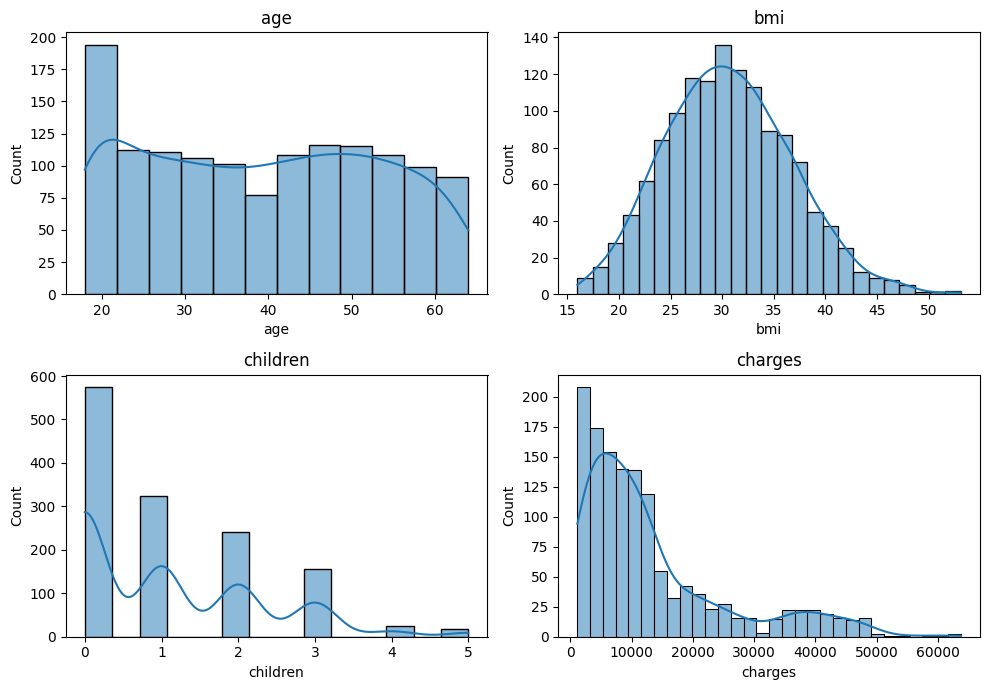

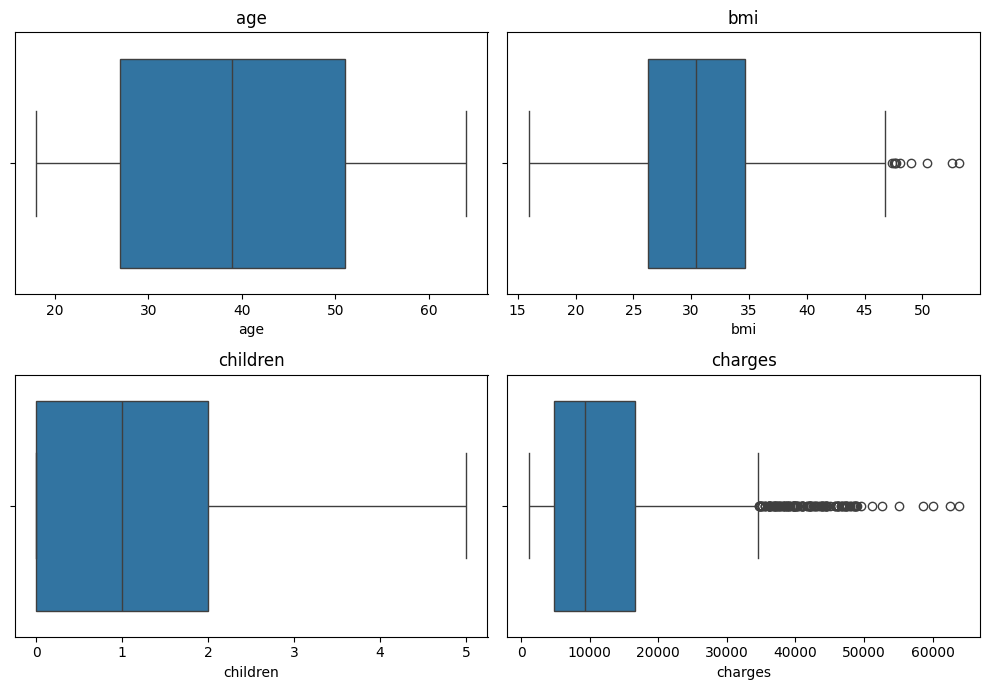

In [22]:
# Seleccionar las variables numéricas
numeric_vars = ["age", "bmi", "children", "charges"]

# Crear un subgráfico para cada variable numérica
fig, axes = plt.subplots(2, 2, figsize=(10, 7))
for i, var in enumerate(numeric_vars):
    row = i // 2
    col = i % 2
    sns.histplot(data=total_data, x=var, ax=axes[row, col], kde=True)  # Agregamos KDE para suavizar la distribución
    axes[row, col].set_title(var)

# Ajustar el diseño
plt.tight_layout()
plt.show()

# Crear box plots para una visión más detallada
fig, axes = plt.subplots(2, 2, figsize=(10, 7))

for i, var in enumerate(numeric_vars):
    row = i // 2
    col = i % 2
    sns.boxplot(data=total_data, x=var, ax=axes[row, col])
    axes[row, col].set_title(var)

plt.tight_layout()
plt.show()

Del histograma y diagrama de caja podemos decir que:

* (`age`) Edad del beneficiario principal: la concentracion de las edades entre los 20 y 50 años.

* (`bmi`) indice de masa corporal: la grafica se visualiza simetrica con similitud a la grafica de una normal.

* (`children`) Numero de niños/dependientes cubiertos por un seguro medico: las edades de niños que cubren el seguro estan concentrados entre 0 y 2 años de edad.

* (`charges`) Prima del seguro medico: la grafica posee una asimetria a la derecha, donde la mayor parte de los precios de la prima estan ubicados entre los 5000 USD y 30000 USD


#### Analisis multivariante

##### Variables numericas

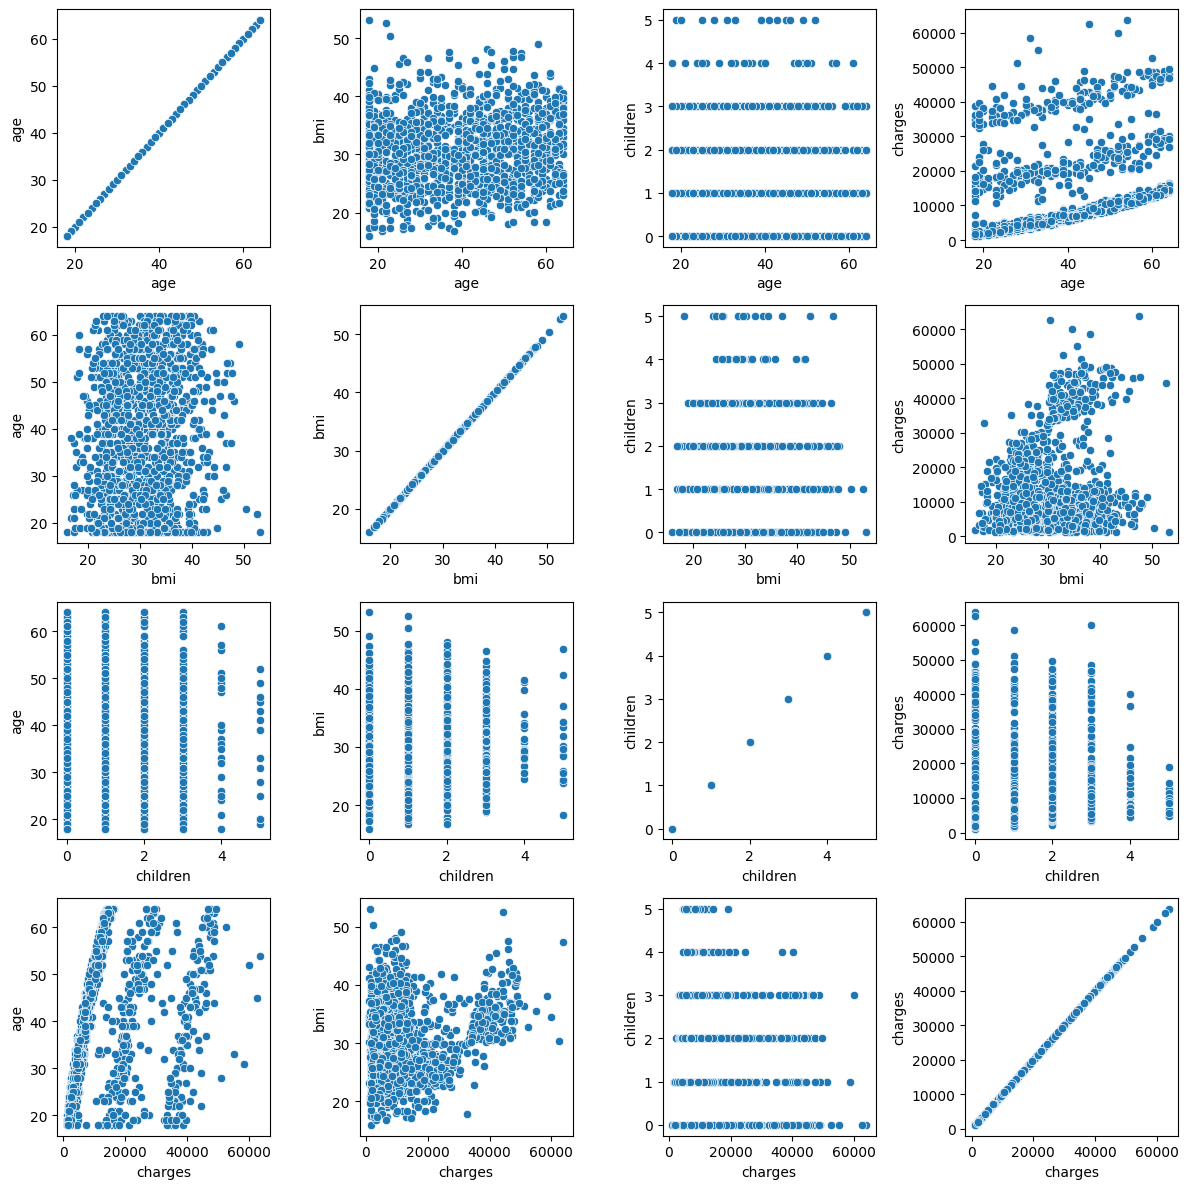

In [19]:

# Crear una figura con subplots para cada par de variables
fig, axes = plt.subplots(len(numeric_vars), len(numeric_vars), figsize=(12, 12))

# Análisis numérico-numérico
for i, var1 in enumerate(numeric_vars):
    for j, var2 in enumerate(numeric_vars):
        # Crear un scatter plot en cada subplot
        sns.scatterplot(data=total_data, x=var1, y=var2, ax=axes[i, j])
        axes[i, j].set_xlabel(var1)
        axes[i, j].set_ylabel(var2)

# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()

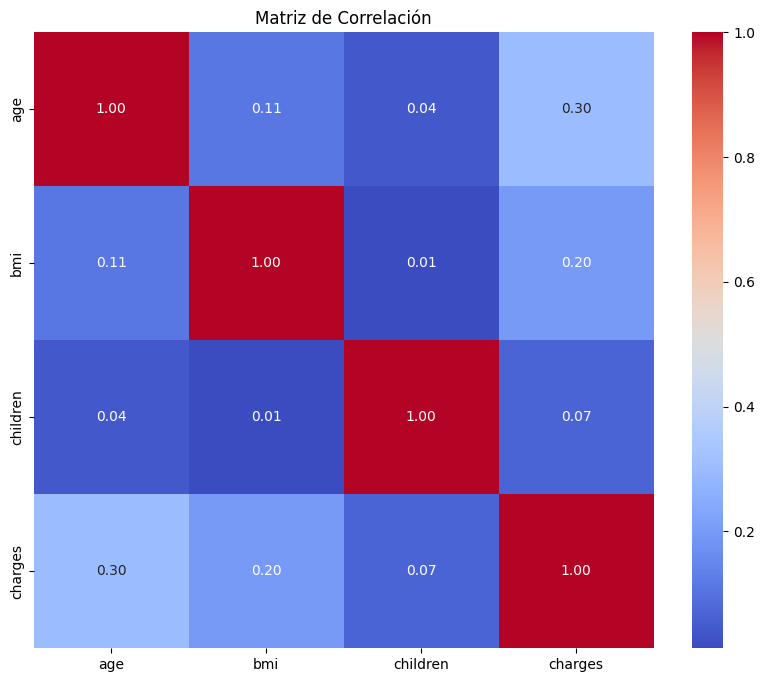

In [20]:
# Crear un subconjunto de datos solo con las variables numéricas
numeric_df = total_data[numeric_vars]

# Calcular la matriz de correlación
correlation_matrix = numeric_df.corr()

# Crear un mapa de calor para visualizar la correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')  

plt.show()

De las graficas anteriores se pueden decir que las variables no estan correlacionadas entre si, en tal caso solo podemos decir se aprecia una relacion leve entre las variables:

* `chrages` y `age` con 0.30 
* `chrages` y `bmi` con 0.20 

##### Variables categoricas

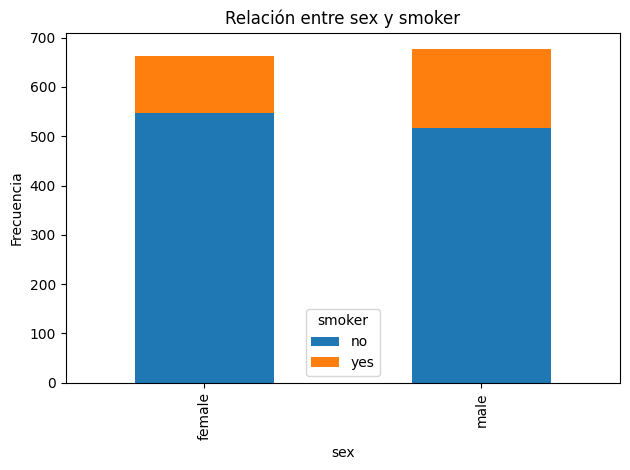

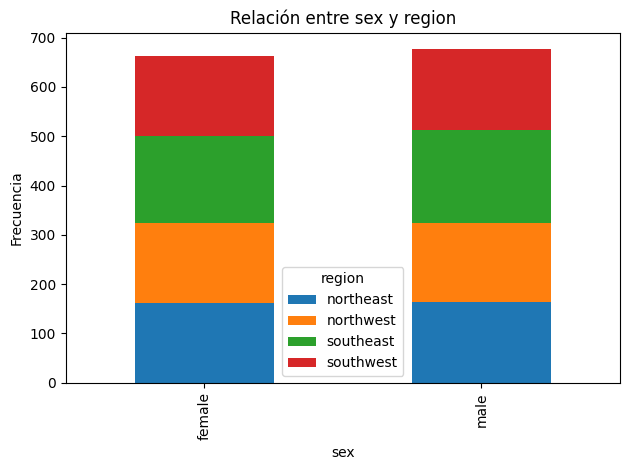

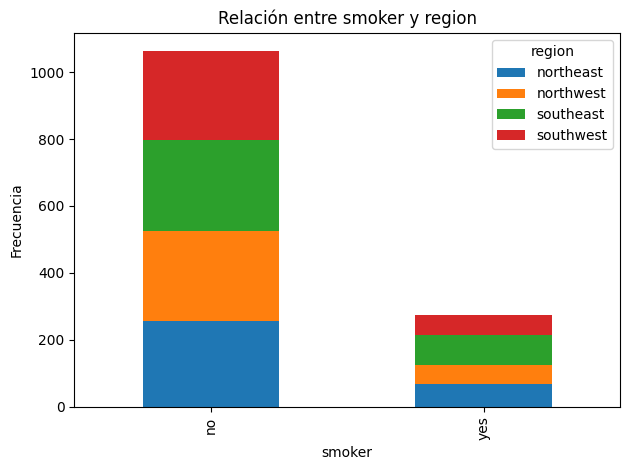

In [24]:
# Crear una tabla de contingencia para cada par de variables categóricas
for i in range(len(categorical_vars)):
    for j in range(i+1, len(categorical_vars)):
        var1 = categorical_vars[i]
        var2 = categorical_vars[j]
        
        # Crear una tabla de contingencia
        crosstab = pd.crosstab(total_data[var1], total_data[var2])
        
        # Crear un gráfico de barras apiladas
        crosstab.plot(kind='bar', stacked=True)
        plt.title(f'Relación entre {var1} y {var2}')
        plt.xlabel(var1)
        plt.ylabel('Frecuencia')

        # Ajustar el diseño y mostrar el gráfico
        plt.tight_layout()
        plt.show()




##### Todas las variables 

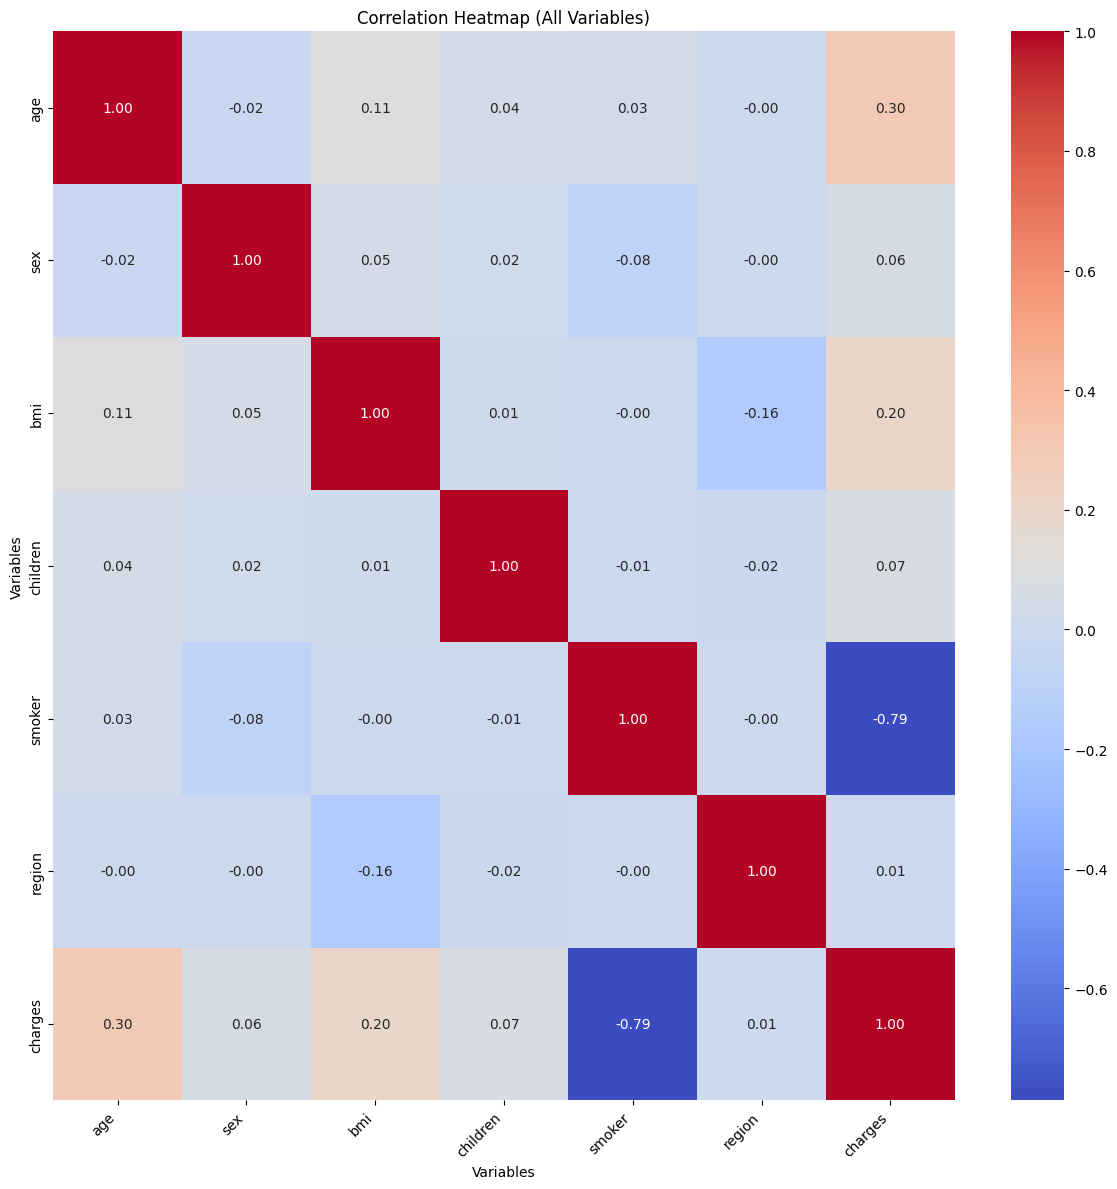

In [27]:
for var in categorical_vars:
    total_data[var] = pd.factorize(total_data[var])[0]

# Create correlation matrix
correlation_matrix = total_data.corr()

# Create a figure for the heatmap
fig, ax = plt.subplots(figsize=(12, 12))  # Adjust size as needed

# Generate heatmap with annotations and color formatting
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', ax=ax)

# Customize heatmap (optional)
ax.set_title('Correlation Heatmap (All Variables)')  # Set title
ax.set_xlabel('Variables')  # Set x-axis label
ax.set_ylabel('Variables')  # Set y-axis label

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels

# Tight layout and show plot
plt.tight_layout()
plt.show()

Se evidencia una correlacion inversa (sentido opuesto) fuerte entre las variables:

+ `charges` y `smoker` de 0.79

#### Ingenieria de funciones

procedamos con los estadisticos descritivos

In [29]:
for var in categorical_vars:
    total_data[var] = pd.factorize(total_data[var])[0]

# Obtener un resumen estadístico de todos los datos
total_data.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.795217,1.484305,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,1.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,1.000000,1.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,1.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010
